<a href="https://colab.research.google.com/github/LydiaOuam/TPDP/blob/main/TPDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP Deep Learning

In [13]:
# Charger les données

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv("bank_customers.csv")

In [45]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


- Little explanation of the data
- We have 14 columns and 10k rows
- We can delete :  RowNumber, CustomerId, Surname
- CreditScore : pay a loan back on time.
- Balance : The money that you have in your bank account.
- Tenure : How old the client is in the bank.
- We need to convert String values to Numeric :
- Gender => F = 1, M = 0
- Geography => France = 0, Spain = 1, Germany = 2





In [46]:
# Drop columns
new_data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [47]:
new_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
new_data['Gender'] = new_data['Gender'].replace({'Female': 1, 'Male': 0})
new_data['Geography'] = new_data['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2  })

In [49]:
new_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [50]:
# Split data
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                new_data.drop('Exited', axis=1),
                new_data['Exited'],
                test_size=0.2,
                random_state=42)


In [51]:
print(X_train.shape)
print(X_test.shape)

(8000, 10)
(2000, 10)


**Standarisation**

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [53]:
from keras.models import Sequential
from keras.layers import Dense

# Initialisation du modèle séquentiel
classifier = Sequential()

# Ajout de la couche d'entrée et de la première couche cachée
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))

# Ajout de la deuxième couche cachée
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Ajout de la couche de sortie
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Configuration du processus d'apprentissage
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle avec validation croisée
classifier.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.4981 - accuracy: 0.7934
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.7945
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4299 - accuracy: 0.7945
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.7961
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8240
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.8285
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4173 - accuracy: 0.8291
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8304
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8315
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4133 - accura

In [54]:
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

63/63 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8460
Test Loss: 0.3903407156467438, Test Accuracy: 0.8460000157356262


In [55]:
predictions = classifier.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

63/63 [==============================] - 0s 1ms/step


In [56]:
from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Matrice de confusion :")
print(conf_matrix)

# Rapport de classification
class_report = classification_report(y_test, predicted_classes)
print("\nRapport de classification :")
print(class_report)


Matrice de confusion :
[[1564   43]
 [ 265  128]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.75      0.33      0.45       393

    accuracy                           0.85      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.83      0.85      0.82      2000



In [57]:
new_data = [[0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]  # Les caractéristiques du client

# Prédiction
prediction = classifier.predict(new_data)

# Affichage de la prédiction
if prediction[0] == 1:
    print("Le client quittera la banque.")
else:
    print("Le client ne quittera pas la banque.")


1/1 [==============================] - 0s 70ms/step
Le client ne quittera pas la banque.


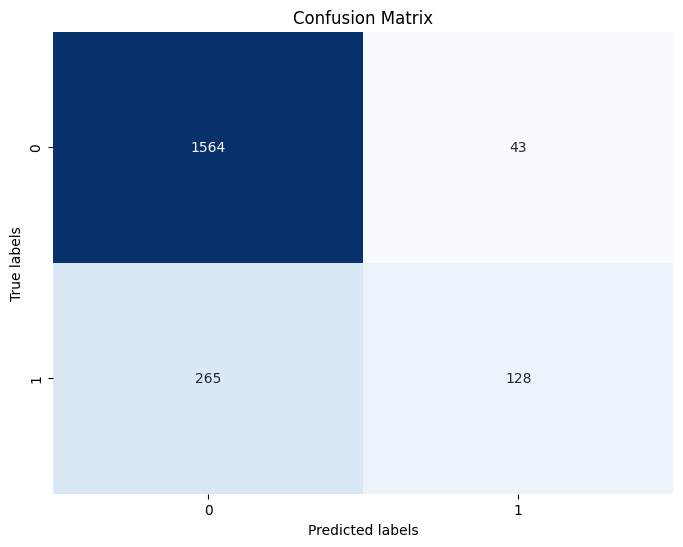

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()